# Задачи по Эконометрике: Бинарные переменные

1 Структурные сдвиги
1.1 Графики

In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import io
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


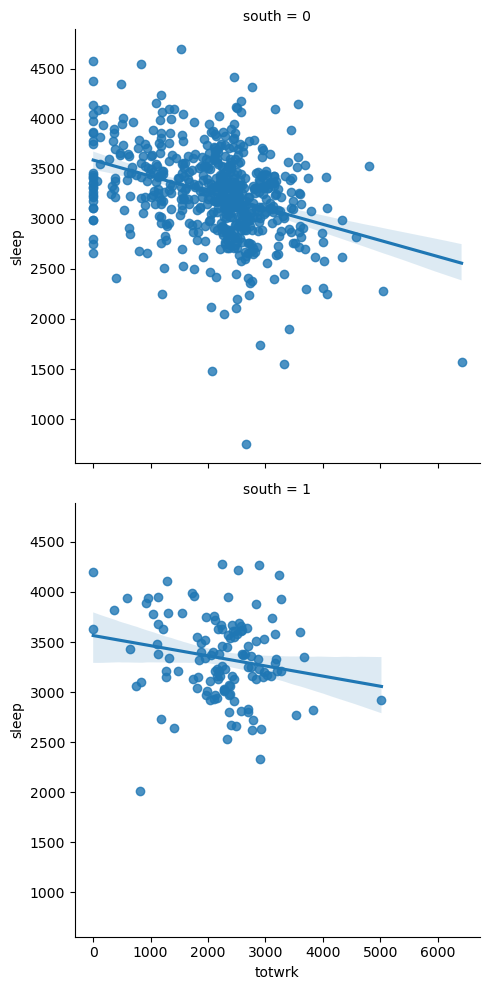

In [3]:

sns.lmplot(x='totwrk',y='sleep',data=df,row='south')

# 1.2 sleep equation #1

In [4]:
data_string = '''R2                      0.115          0.126    '''

In [5]:
R_res,R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [6]:
F_nabl = (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_nabl.round(2)

2.2

In [7]:

alpha = 0.05
stats.f.ppf(1-alpha,4,len(df)-8).round(2)

2.38

$F{cr}>F{набл}$ => принимаем гипотезу Н0, структурные сдвиги незначимы

# 1.3 sleep equation #2|

In [8]:
data_string = '''R2                      0.115          0.131 '''

In [9]:
R_res,R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [10]:
F_nabl = (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_nabl.round(2)

3.21

In [12]:
alpha = 0.1
stats.f.ppf(1-alpha,4,len(df)-8).round(2)

1.95

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, структурные сдвиги значимы

# 1.4 wage equation #1

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [18]:
data_string = '''R2                      0.188          0.205 '''

In [19]:
R_res,R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [20]:
F_nabl = (R_unres-R_res)/(1-R_unres)*(len(df)-10)/5
F_nabl.round(2)

3.96

In [21]:
alpha = 0.05
stats.f.ppf(1-alpha,5,len(df)-10).round(2)

2.22

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, структурные сдвиги значимы

# 1.5 wage equation #2

In [22]:
data_string = '''R2                      0.146          0.182  '''

In [23]:
R_res,R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [24]:
F_nabl = (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_nabl.round(2)

10.2

In [25]:
alpha = 0.1
stats.f.ppf(1-alpha,4,len(df)-8).round(2)

1.95

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, структурные сдвиги значимы

# 2 Небинарные качественые признаки
2.1 diamond equation #1


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
df

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
303,1.01,I,VS1,HRD,8175
304,1.02,F,VVS2,HRD,10796
305,1.06,H,VVS2,HRD,9890
306,1.02,H,VS2,HRD,8959


In [28]:
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


In [29]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [30]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424202, p=5.202465260128389e-49, df_denom=298, df_num=5>

In [31]:
alpha=0.01
stats.f.ppf(1-alpha,5,len(df_all)-10).round(2)

3.08

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, влияние значимо

In [32]:
model_d.f_test('certification_HRD=certification_IGI=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.084620097371314, p=3.5745772535774037e-06, df_denom=298, df_num=2>

In [33]:
alpha=0.01
stats.f.ppf(1-alpha,2,len(df_all)-8).round(2)

4.68

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, влияние значимо

# 2.2 diamond equation #2

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [44]:
df_all = pd.get_dummies(df.loc[:,['price','carat','color','cut','x','y','z']])
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [45]:
df_all = df_all.rename(columns={'cut_Very Good': 'cut_Very_Good'})
df_all

,price,carat,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good
0,326,0.23,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,1,0,0
1,326,0.21,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,0,1,0
2,327,0.23,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,1,0
4,335,0.31,4.34,4.35,2.75,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0
53936,2757,0.72,5.69,5.75,3.61,1,0,0,0,0,0,0,0,1,0,0,0
53937,2757,0.70,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,0,0,1
53938,2757,0.86,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0


In [46]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+color_E+color_F+color_G+color_H+color_I+color_J+cut_Good+cut_Very_Good+cut_Premium+cut_Ideal+x+y+z',data=df_all).fit()
model_d.params

Intercept        3.991634
carat            2.535459
I(carat ** 2)   -0.645788
color_E         -0.030235
color_F         -0.039489
color_G         -0.071381
color_H         -0.210150
color_I         -0.307512
color_J         -0.432402
cut_Good         0.118383
cut_Very_Good    0.177357
cut_Premium      0.161182
cut_Ideal        0.250758
x                0.338985
y                0.014541
z                0.063132
dtype: float64

In [47]:
model_d.f_test('color_E=color_F=color_G=color_H=color_I=color_J=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2282.3701477852273, p=0.0, df_denom=5.39e+04, df_num=6>

In [48]:
alpha=0.05
stats.f.ppf(1-alpha,6,len(df_all)-16).round(2)

2.1

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, влияние значимо

In [51]:

model_d.f_test('cut_Good=cut_Very_Good=cut_Premium=cut_Ideal=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=797.0664644236981, p=0.0, df_denom=5.39e+04, df_num=4>

In [52]:
alpha=0.05
stats.f.ppf(1-alpha,4,len(df_all)-16).round(2)

2.37

$F{cr}<F{набл}$ => не принимаем гипотезу Н0, влияние значимо